## Importing Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

import os
import yaml
import json
import random
import shutil
from pathlib import Path

from collections import Counter
from collections import defaultdict

## Loading the Instances json files

In [2]:
# === Load dataset ===
json_path_train = "./dataset/seadronessee/annotations/instances_train_objects_in_water.json"
json_path_val = "./dataset/seadronessee/annotations/instances_val_objects_in_water.json"
json_path_test = "./dataset/seadronessee/annotations/instances_test_objects_in_water.json"
with open(json_path_train, 'r') as f:
    train_data = json.load(f)

with open(json_path_val, 'r') as f:
    val_data = json.load(f)

with open(json_path_test, 'r') as f:
    test_data = json.load(f)

## Understanding the instances

In [3]:
train_data.keys()

dict_keys(['info', 'licenses', 'categories', 'images', 'annotations', 'videos', 'tracks'])

In [4]:
val_data.keys()

dict_keys(['info', 'licenses', 'categories', 'images', 'annotations', 'videos', 'tracks'])

In [5]:
test_data.keys()

dict_keys(['info', 'licenses', 'categories', 'images', 'annotations', 'videos', 'tracks'])

In [6]:
for cat in train_data['categories']:
    print(cat)

{'supercategory': 'person', 'id': 1, 'name': 'swimmer'}
{'supercategory': 'person', 'id': 2, 'name': 'swimmer with life jacket'}
{'supercategory': 'boat', 'id': 3, 'name': 'boat'}
{'supercategory': 'lifejacket', 'id': 6, 'name': 'life jacket'}


In [7]:
for cat in val_data['categories']:
    print(cat)

{'supercategory': 'person', 'id': 1, 'name': 'swimmer'}
{'supercategory': 'person', 'id': 2, 'name': 'swimmer with life jacket'}
{'supercategory': 'boat', 'id': 3, 'name': 'boat'}
{'supercategory': 'lifejacket', 'id': 6, 'name': 'life jacket'}


In [8]:
for cat in test_data['categories']:
    print(cat)

{'supercategory': 'person', 'id': 1, 'name': 'swimmer'}
{'supercategory': 'person', 'id': 2, 'name': 'swimmer with life jacket'}
{'supercategory': 'boat', 'id': 3, 'name': 'boat'}
{'supercategory': 'lifejacket', 'id': 6, 'name': 'life jacket'}


In [9]:
train_data['images'][0]

{'id': 0,
 'file_name': '0.png',
 'height': 2160,
 'width': 3840,
 'source': {'drone': 'mavic',
  'folder_name': 'DJI_0057',
  'video': 'DJI_0057.MP4',
  'frame_no': 0},
 'video_id': 0,
 'frame_index': 0,
 'date_time': '2020-08-27T14:18:12',
 'meta': {'date_time': '2020-08-27T12:18:12',
  'gps_latitude': 47.671755,
  'gps_latitude_ref': 'N',
  'gps_longitude': 9.269907,
  'gps_longitude_ref': 'E',
  'altitude': 11.299448948491314,
  'gimbal_pitch': 45.4,
  'compass_heading': 319.3,
  'gimbal_heading': 322.4,
  'speed': 2.3429371569065713,
  'xspeed': 1.7999517210549845,
  'yspeed': -1.4999597675458203,
  'zspeed': 0.0}}

In [10]:
val_data['images'][0]

{'id': 267,
 'file_name': '267.png',
 'height': 2160,
 'width': 3840,
 'source': {'drone': 'mavic',
  'folder_name': 'DJI_0057',
  'video': 'DJI_0057.MP4',
  'frame_no': 572},
 'video_id': 0,
 'frame_index': 572,
 'date_time': '2020-08-27T14:18:31.052367',
 'meta': {'date_time': '2020-08-27T12:18:31',
  'gps_latitude': 47.672019,
  'gps_latitude_ref': 'N',
  'gps_longitude': 9.269629,
  'gps_longitude_ref': 'E',
  'altitude': 8.699575739103933,
  'gimbal_pitch': 45.4,
  'compass_heading': 138.8,
  'gimbal_heading': 140.9,
  'speed': 2.3349373714796604,
  'xspeed': -1.6999544032185963,
  'yspeed': 1.5999570853822083,
  'zspeed': 0.0}}

In [11]:
test_data['images'][0]

{'id': 410,
 'file_name': '410.png',
 'height': 2160,
 'width': 3840,
 'source': {'drone': 'mavic',
  'folder_name': 'DJI_0057',
  'video': 'DJI_0057.MP4',
  'frame_no': 715},
 'video_id': 0,
 'frame_index': 715,
 'date_time': '2020-08-27T14:18:35.823800',
 'meta': {'date_time': '2020-08-27T12:18:36',
  'gps_latitude': 47.671949,
  'gps_latitude_ref': 'N',
  'gps_longitude': 9.269724,
  'gps_longitude_ref': 'E',
  'altitude': 8.599580615665955,
  'gimbal_pitch': 45.4,
  'compass_heading': 138.2,
  'gimbal_heading': 140.9,
  'speed': 0.6399828341528834,
  'xspeed': -0.39998927134555207,
  'yspeed': 0.39998927134555207,
  'zspeed': 0.299991953509164}}

In [12]:
for i in range(0,10):
    print(train_data['annotations'][i])

{'id': 0, 'image_id': 0, 'bbox': [1783, 1079, 186, 249], 'area': 46314, 'category_id': 2, 'video_id': 0, 'track_id': 0}
{'id': 1, 'image_id': 0, 'bbox': [1547, 694, 271, 175], 'area': 47425, 'category_id': 2, 'video_id': 0, 'track_id': 1}
{'id': 2, 'image_id': 0, 'bbox': [1811, 367, 129, 162], 'area': 20898, 'category_id': 2, 'video_id': 0, 'track_id': 2}
{'id': 3, 'image_id': 0, 'bbox': [1588, 360, 122, 229], 'area': 27938, 'category_id': 1, 'video_id': 0, 'track_id': 3}
{'id': 4, 'image_id': 0, 'bbox': [3386, 75, 221, 82], 'area': 18122, 'category_id': 2, 'video_id': 0, 'track_id': 4}
{'id': 5, 'image_id': 1, 'bbox': [1776, 1109, 189, 253], 'area': 47817, 'category_id': 2, 'video_id': 0, 'track_id': 0}
{'id': 6, 'image_id': 1, 'bbox': [1537, 720, 280, 178], 'area': 49840, 'category_id': 2, 'video_id': 0, 'track_id': 1}
{'id': 7, 'image_id': 1, 'bbox': [1799, 387, 137, 164], 'area': 22468, 'category_id': 2, 'video_id': 0, 'track_id': 2}
{'id': 8, 'image_id': 1, 'bbox': [1580, 380, 123

In [13]:
for i in range(0,10):
    print(val_data['annotations'][i])

{'id': 1200, 'image_id': 267, 'bbox': [789, 1412, 450, 204], 'area': 91800, 'category_id': 2, 'video_id': 0, 'track_id': 7}
{'id': 1201, 'image_id': 267, 'bbox': [96, 884, 297, 296], 'area': 87912, 'category_id': 2, 'video_id': 0, 'track_id': 10}
{'id': 1202, 'image_id': 267, 'bbox': [0, 1893, 406, 266], 'area': 107996, 'category_id': 2, 'video_id': 0, 'track_id': 9}
{'id': 1203, 'image_id': 267, 'bbox': [3206, 942, 181, 149], 'area': 26969, 'category_id': 1, 'video_id': 0, 'track_id': 11}
{'id': 1204, 'image_id': 267, 'bbox': [2915, 887, 229, 116], 'area': 26564, 'category_id': 2, 'video_id': 0, 'track_id': 12}
{'id': 1205, 'image_id': 267, 'bbox': [2953, 684, 152, 113], 'area': 17176, 'category_id': 2, 'video_id': 0, 'track_id': 13}
{'id': 1206, 'image_id': 267, 'bbox': [2343, 210, 192, 143], 'area': 27456, 'category_id': 2, 'video_id': 0, 'track_id': 14}
{'id': 1207, 'image_id': 268, 'bbox': [780, 1434, 455, 205], 'area': 93275, 'category_id': 2, 'video_id': 0, 'track_id': 7}
{'id':

In [14]:
print(test_data['annotations'])

None


In [15]:
print(train_data['videos'])

[{'id': 0, 'height': 2160, 'width': 3840, 'name:': '/data/input/recordings/mavic/DJI_0057.MP4'}, {'id': 1, 'height': 2160, 'width': 3840, 'name:': '/data/input/recordings/mavic/DJI_0055.MP4'}, {'id': 2, 'height': 2160, 'width': 3840, 'name:': '/data/input/recordings/mavic/DJI_0039.MP4'}, {'id': 4, 'height': 2160, 'width': 3840, 'name:': '/data/input/recordings/mavic/DJI_0063.MP4'}, {'id': 5, 'height': 2160, 'width': 3840, 'name:': '/data/input/recordings/mavic/DJI_0065.MP4'}, {'id': 6, 'height': 2160, 'width': 3840, 'name:': '/data/input/recordings/mavic/DJI_0032.MP4'}, {'id': 7, 'height': 2160, 'width': 3840, 'name:': '/data/input/recordings/mavic/DJI_0050.MP4'}, {'id': 8, 'height': 2160, 'width': 3840, 'name:': '/data/input/recordings/mavic/DJI_0062.MP4'}, {'id': 9, 'height': 2160, 'width': 3840, 'name:': '/data/input/recordings/mavic/DJI_0069.MP4'}, {'id': 10, 'height': 2160, 'width': 3840, 'name:': '/data/input/recordings/mavic/DJI_0041.MP4'}, {'id': 11, 'height': 2160, 'width': 38

In [16]:
print(val_data['videos'])

[{'id': 0, 'height': 2160, 'width': 3840, 'name:': '/data/input/recordings/mavic/DJI_0057.MP4'}, {'id': 1, 'height': 2160, 'width': 3840, 'name:': '/data/input/recordings/mavic/DJI_0055.MP4'}, {'id': 2, 'height': 2160, 'width': 3840, 'name:': '/data/input/recordings/mavic/DJI_0039.MP4'}, {'id': 4, 'height': 2160, 'width': 3840, 'name:': '/data/input/recordings/mavic/DJI_0063.MP4'}, {'id': 5, 'height': 2160, 'width': 3840, 'name:': '/data/input/recordings/mavic/DJI_0065.MP4'}, {'id': 6, 'height': 2160, 'width': 3840, 'name:': '/data/input/recordings/mavic/DJI_0032.MP4'}, {'id': 9, 'height': 2160, 'width': 3840, 'name:': '/data/input/recordings/mavic/DJI_0069.MP4'}, {'id': 10, 'height': 2160, 'width': 3840, 'name:': '/data/input/recordings/mavic/DJI_0041.MP4'}, {'id': 11, 'height': 2160, 'width': 3840, 'name:': '/data/input/recordings/mavic/DJI_0038.MP4'}, {'id': 12, 'height': 2160, 'width': 3840, 'name:': '/data/input/recordings/mavic/DJI_0059.MP4'}, {'id': 13, 'height': 2160, 'width': 

In [17]:
print(test_data['videos'])

[{'id': 0, 'height': 2160, 'width': 3840, 'name:': '/data/input/recordings/mavic/DJI_0057.MP4'}, {'id': 1, 'height': 2160, 'width': 3840, 'name:': '/data/input/recordings/mavic/DJI_0055.MP4'}, {'id': 2, 'height': 2160, 'width': 3840, 'name:': '/data/input/recordings/mavic/DJI_0039.MP4'}, {'id': 3, 'height': 2160, 'width': 3840, 'name:': '/data/input/recordings/mavic/DJI_0051.MP4'}, {'id': 4, 'height': 2160, 'width': 3840, 'name:': '/data/input/recordings/mavic/DJI_0063.MP4'}, {'id': 5, 'height': 2160, 'width': 3840, 'name:': '/data/input/recordings/mavic/DJI_0065.MP4'}, {'id': 6, 'height': 2160, 'width': 3840, 'name:': '/data/input/recordings/mavic/DJI_0032.MP4'}, {'id': 9, 'height': 2160, 'width': 3840, 'name:': '/data/input/recordings/mavic/DJI_0069.MP4'}, {'id': 10, 'height': 2160, 'width': 3840, 'name:': '/data/input/recordings/mavic/DJI_0041.MP4'}, {'id': 11, 'height': 2160, 'width': 3840, 'name:': '/data/input/recordings/mavic/DJI_0038.MP4'}, {'id': 12, 'height': 2160, 'width': 3

In [18]:
print(train_data['tracks'])

[{'id': 0, 'category_id': 2, 'video_id': 0}, {'id': 1, 'category_id': 2, 'video_id': 0}, {'id': 2, 'category_id': 2, 'video_id': 0}, {'id': 3, 'category_id': 1, 'video_id': 0}, {'id': 4, 'category_id': 2, 'video_id': 0}, {'id': 5, 'category_id': 2, 'video_id': 0}, {'id': 6, 'category_id': 2, 'video_id': 0}, {'id': 7, 'category_id': 2, 'video_id': 0}, {'id': 8, 'category_id': 2, 'video_id': 0}, {'id': 9, 'category_id': 2, 'video_id': 0}, {'id': 10, 'category_id': 2, 'video_id': 0}, {'id': 11, 'category_id': 1, 'video_id': 0}, {'id': 12, 'category_id': 2, 'video_id': 0}, {'id': 13, 'category_id': 2, 'video_id': 0}, {'id': 14, 'category_id': 2, 'video_id': 0}, {'id': 23, 'category_id': 3, 'video_id': 1}, {'id': 25, 'category_id': 2, 'video_id': 1}, {'id': 26, 'category_id': 2, 'video_id': 1}, {'id': 27, 'category_id': 2, 'video_id': 1}, {'id': 28, 'category_id': 2, 'video_id': 1}, {'id': 29, 'category_id': 3, 'video_id': 1}, {'id': 31, 'category_id': 2, 'video_id': 1}, {'id': 32, 'categor

In [19]:
print(test_data['tracks'])

None


## Basic EDA

In [20]:
# === Basic info ===
print("Number of images:", len(train_data['images']))
print("Number of annotations:", len(train_data['annotations']))
print("Number of categories:", len(train_data['categories']))
print("Number of videos:", len(train_data['videos']))
print("Number of tracks:", len(train_data['tracks']))

Number of images: 27259
Number of annotations: 160470
Number of categories: 4
Number of videos: 20
Number of tracks: 323


In [21]:
# === Basic info ===
print("Number of images:", len(val_data['images']))
print("Number of annotations:", len(val_data['annotations']))
print("Number of categories:", len(val_data['categories']))
print("Number of videos:", len(val_data['videos']))
print("Number of tracks:", len(val_data['tracks']))

Number of images: 8584
Number of annotations: 47678
Number of categories: 4
Number of videos: 17
Number of tracks: 471


In [22]:
# === Basic info ===
print("Number of images:", len(test_data['images']))
print("Number of categories:", len(test_data['categories']))
print("Number of videos:", len(test_data['videos']))

Number of images: 18253
Number of categories: 4
Number of videos: 19


In [23]:
image_id = train_data['images'][0]['id']
anns = [ann for ann in train_data['annotations'] if ann['image_id'] == image_id]
anns

[{'id': 0,
  'image_id': 0,
  'bbox': [1783, 1079, 186, 249],
  'area': 46314,
  'category_id': 2,
  'video_id': 0,
  'track_id': 0},
 {'id': 1,
  'image_id': 0,
  'bbox': [1547, 694, 271, 175],
  'area': 47425,
  'category_id': 2,
  'video_id': 0,
  'track_id': 1},
 {'id': 2,
  'image_id': 0,
  'bbox': [1811, 367, 129, 162],
  'area': 20898,
  'category_id': 2,
  'video_id': 0,
  'track_id': 2},
 {'id': 3,
  'image_id': 0,
  'bbox': [1588, 360, 122, 229],
  'area': 27938,
  'category_id': 1,
  'video_id': 0,
  'track_id': 3},
 {'id': 4,
  'image_id': 0,
  'bbox': [3386, 75, 221, 82],
  'area': 18122,
  'category_id': 2,
  'video_id': 0,
  'track_id': 4}]

In [29]:
def plot_category_distribution(data, title, ax):
    # === Category mapping ===
    cat_id_to_name = {c['id']: c['name'] for c in data['categories']}

    # === Category distribution ===
    cat_counts = Counter([ann['category_id'] for ann in data['annotations']])
    cat_counts_named = {cat_id_to_name[k]: v for k, v in cat_counts.items()}

    sns.barplot(
        x=list(cat_counts_named.keys()),
        y=list(cat_counts_named.values()),
        ax=ax
    )
    ax.set_title(title)
    ax.set_ylabel("Number of Objects")
    labels = ax.get_xticklabels()
    for label in labels:
        label.set_rotation(45)
        label.set_ha('right')

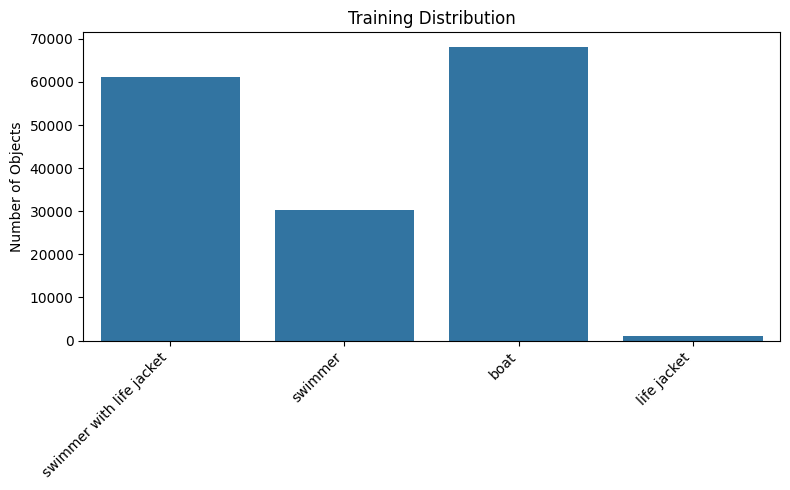

In [8]:
fig, axes = plt.subplots(1, 1, figsize=(8, 5), sharey=True)
plot_category_distribution(train_data, "Training Distribution", axes)
plt.tight_layout()
plt.show()

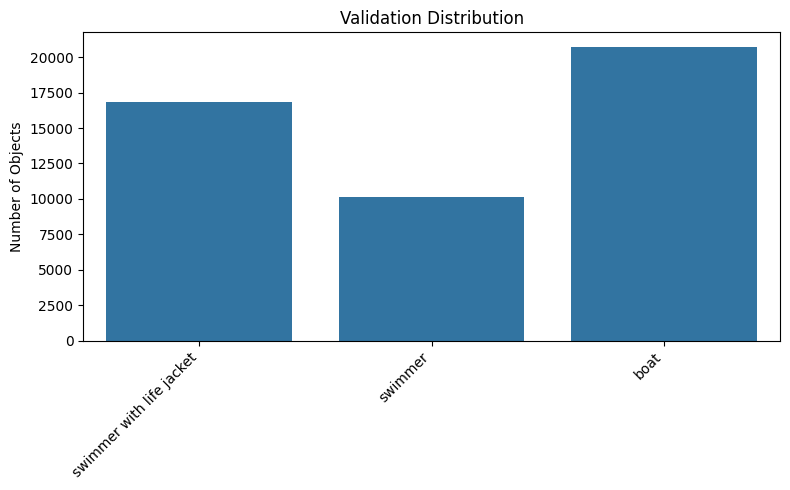

In [9]:
fig, axes = plt.subplots(1, 1, figsize=(8, 5), sharey=True)
plot_category_distribution(val_data, "Validation Distribution", axes)
plt.tight_layout()
plt.show()

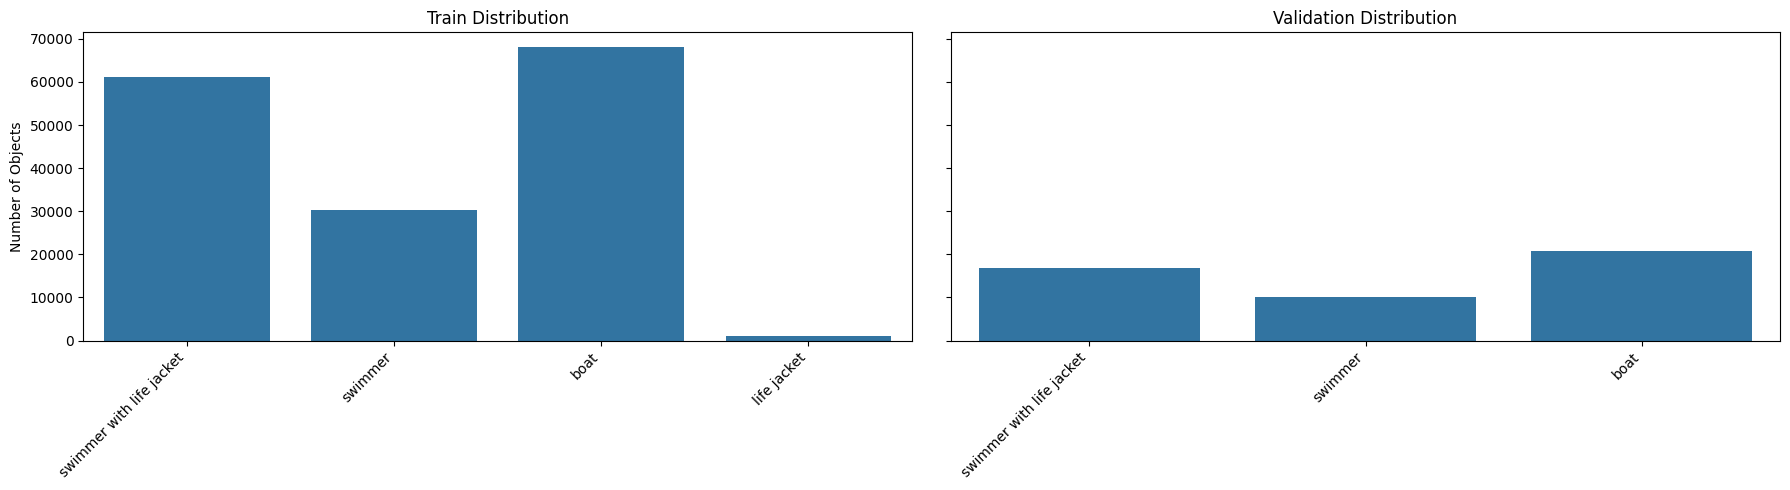

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5), sharey=True)

plot_category_distribution(train_data, "Train Distribution", axes[0])
plot_category_distribution(val_data, "Validation Distribution", axes[1])

plt.tight_layout()
plt.show()

In [26]:
def print_category_distribution(data, title):
    # === Category mapping ===
    cat_id_to_name = {c['id']: c['name'] for c in data['categories']}

    # === Category distribution ===
    cat_counts = Counter([ann['category_id'] for ann in data['annotations']])
    cat_counts_named = {cat_id_to_name[k]: v for k, v in cat_counts.items()}

    print(f"\n{title}")
    for category, count in cat_counts_named.items():
        print(f"{category}: {count}")

In [31]:
# Example usage
print_category_distribution(train_data, "Train Data Distribution")
print_category_distribution(val_data, "Validation Data Distribution")


Train Data Distribution
swimmer with life jacket: 61175
swimmer: 30182
boat: 68097
life jacket: 1016

Validation Data Distribution
swimmer with life jacket: 16856
swimmer: 10107
boat: 20715


In [32]:
def plot_box_distribution(data):
    # === Bounding box stats ===
    # COCO bbox format: [x_min, y_min, width, height]
    widths = [ann['bbox'][2] for ann in data['annotations']]
    heights = [ann['bbox'][3] for ann in data['annotations']]
    areas = [w*h for w, h in zip(widths, heights)]
    
    plt.figure(figsize=(12,4))
    plt.subplot(1,3,1)
    sns.histplot(widths, bins=50, kde=False)
    plt.title("BBox Width Distribution")
    
    plt.subplot(1,3,2)
    sns.histplot(heights, bins=50, kde=False)
    plt.title("BBox Height Distribution")
    
    plt.subplot(1,3,3)
    sns.histplot(areas, bins=50, kde=False)
    plt.title("BBox Area Distribution")
    
    plt.tight_layout()
    plt.show()

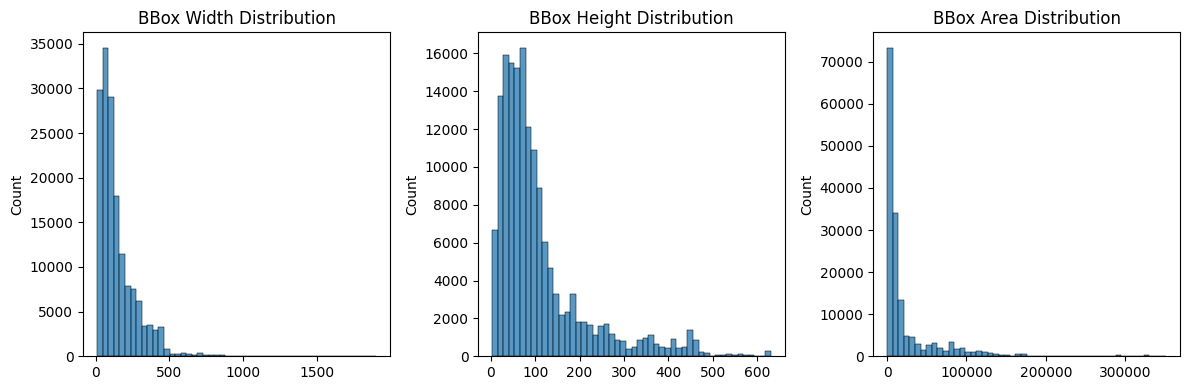

In [33]:
plot_box_distribution(train_data)

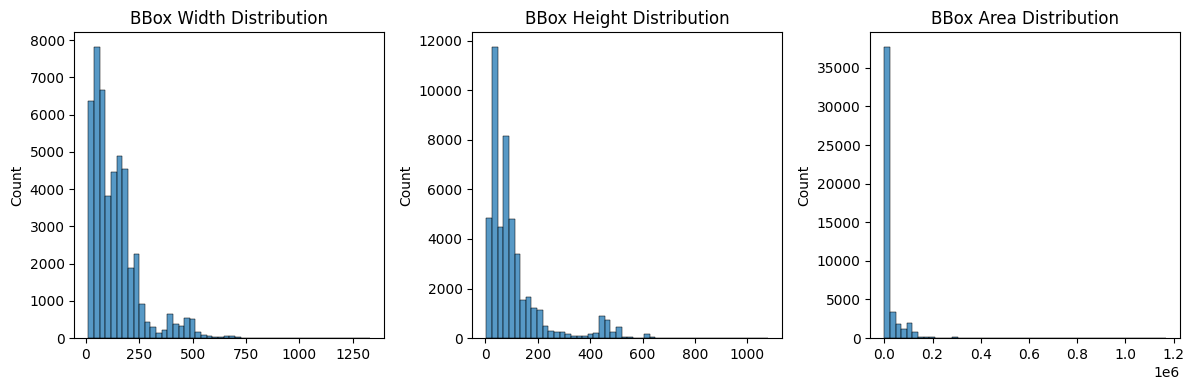

In [34]:
plot_box_distribution(val_data)

In [38]:
# === Image resolution ===
img_widths_in_train = set([img['width'] for img in train_data['images']])
img_heights_in_train = set([img['height'] for img in train_data['images']])
print(img_widths_in_train)
print(img_heights_in_train)

{3840}
{2160}


In [39]:
# === Image resolution ===
img_widths_in_val = set([img['width'] for img in val_data['images']])
img_heights_in_val = set([img['height'] for img in val_data['images']])
print(img_widths_in_val)
print(img_heights_in_val)

{3840}
{2160}


In [40]:
# === Image resolution ===
img_widths_in_test = set([img['width'] for img in test_data['images']])
img_heights_in_test = set([img['height'] for img in test_data['images']])
print(img_widths_in_test)
print(img_heights_in_test)

{3840}
{2160}


In [41]:
# === Tracks per video (for tracking tasks) ===
def object_per_track_plot(data):
    track_counts = Counter([ann['track_id'] for ann in data['annotations'] if 'track_id' in ann])
    plt.figure(figsize=(8,4))
    sns.histplot(list(track_counts.values()), bins=30)
    plt.title("Objects per Track")
    plt.xlabel("Track length (# frames)")
    plt.show()

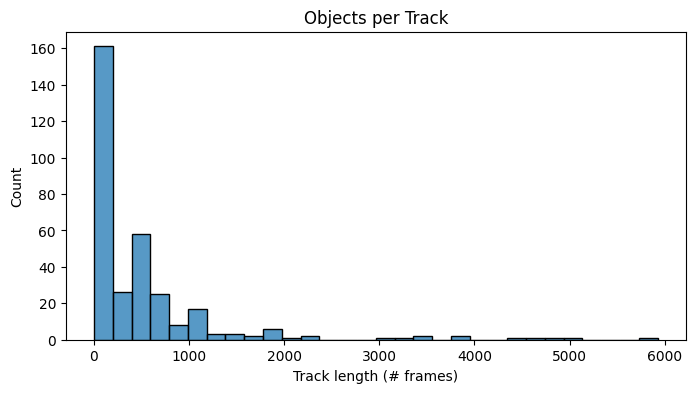

In [42]:
object_per_track_plot(train_data)

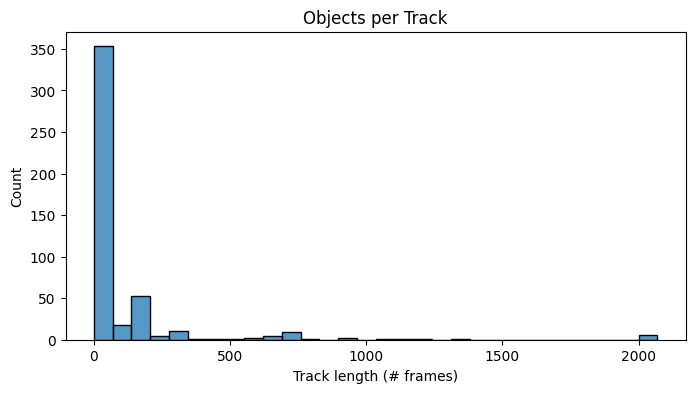

In [43]:
object_per_track_plot(val_data)

In [44]:
# Path to your dataset
images_dir = r"D:\Dataset\Compressed\train"  # Folder containing .jpg images

# Map category IDs to names
cat_id_to_name = {cat["id"]: cat["name"] for cat in train_data["categories"]}

# Map image ID to file name
image_id_to_filename = {img["id"]: img["file_name"] for img in train_data["images"]}

# Group annotations by image_id
annotations_by_image = {}
for ann in train_data["annotations"]:
    img_id = ann["image_id"]
    if img_id not in annotations_by_image:
        annotations_by_image[img_id] = []
    annotations_by_image[img_id].append(ann)

# Function to display an image with bounding boxes
def show_image_with_boxes(img_path, annotations):
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    for ann in annotations:
        x, y, w, h = ann["bbox"]
        category = cat_id_to_name[ann["category_id"]]
        cv2.rectangle(image, (int(x), int(y)), (int(x + w), int(y + h)), (255, 0, 0), 2)
        cv2.putText(image, category, (int(x), int(y - 5)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    plt.imshow(image)
    plt.axis('off')
    plt.show()

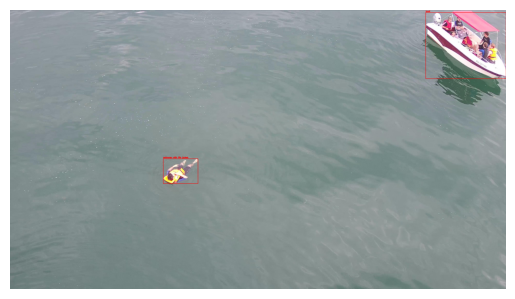

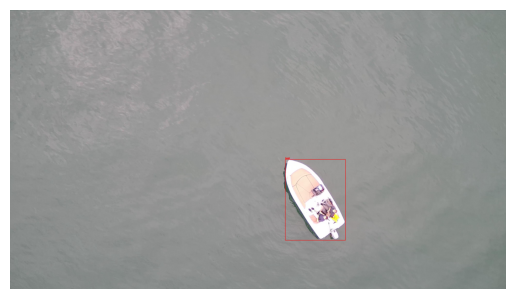

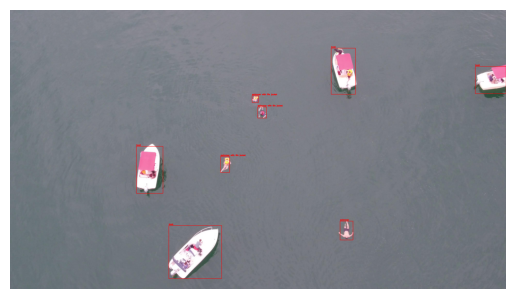

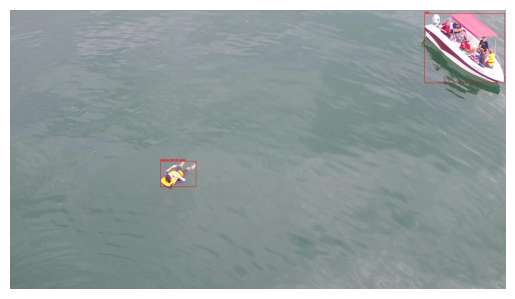

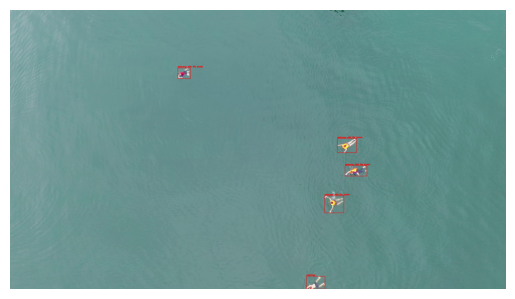

In [45]:
# Pick random images to visualize
random_img_ids = random.sample(list(image_id_to_filename.keys()), 5)

for img_id in random_img_ids:
    # Handle file extension change from .png to .jpg
    img_name = os.path.splitext(image_id_to_filename[img_id])[0] + ".jpg"
    img_path = os.path.join(images_dir, img_name)

    if os.path.exists(img_path):
        anns = annotations_by_image.get(img_id, [])
        show_image_with_boxes(img_path, anns)
    else:
        print(f"Image not found: {img_path}")

## Pre-Processing

In [24]:
def fix_image_ext(data):
    for img in data["images"]:
        if img["file_name"].endswith(".png"):
            img["file_name"] = img["file_name"].replace(".png", ".jpg")

In [25]:
fix_image_ext(train_data)
fix_image_ext(val_data)
fix_image_ext(test_data)

In [26]:
train_data['images'][0]

{'id': 0,
 'file_name': '0.jpg',
 'height': 2160,
 'width': 3840,
 'source': {'drone': 'mavic',
  'folder_name': 'DJI_0057',
  'video': 'DJI_0057.MP4',
  'frame_no': 0},
 'video_id': 0,
 'frame_index': 0,
 'date_time': '2020-08-27T14:18:12',
 'meta': {'date_time': '2020-08-27T12:18:12',
  'gps_latitude': 47.671755,
  'gps_latitude_ref': 'N',
  'gps_longitude': 9.269907,
  'gps_longitude_ref': 'E',
  'altitude': 11.299448948491314,
  'gimbal_pitch': 45.4,
  'compass_heading': 319.3,
  'gimbal_heading': 322.4,
  'speed': 2.3429371569065713,
  'xspeed': 1.7999517210549845,
  'yspeed': -1.4999597675458203,
  'zspeed': 0.0}}

In [27]:
# Step 1: Find the category_id for "life jacket"
life_jacket_ids = [c['id'] for c in train_data['categories'] if c['name'] == 'life jacket']

if life_jacket_ids:
    life_jacket_id = life_jacket_ids[0]
    print(f"Removing category ID {life_jacket_id} ('life jacket')")

    # Step 2: Remove the category entry
    train_data['categories'] = [c for c in train_data['categories'] if c['id'] != life_jacket_id]

    # Step 3: Remove all annotations for that category
    train_data['annotations'] = [a for a in train_data['annotations'] if a['category_id'] != life_jacket_id]

else:
    print("'life jacket' class not found in categories.")

Removing category ID 6 ('life jacket')


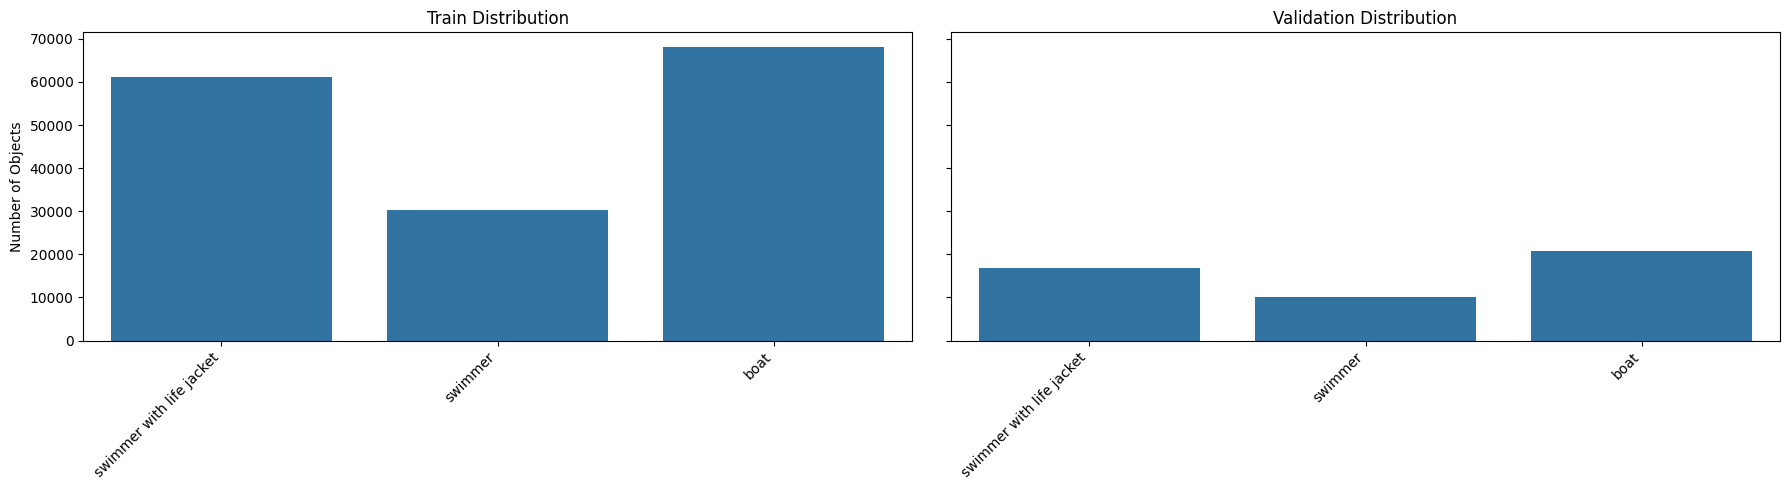

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5), sharey=True)

plot_category_distribution(train_data, "Train Distribution", axes[0])
plot_category_distribution(val_data, "Validation Distribution", axes[1])

plt.tight_layout()
plt.show()

In [31]:
for ann in train_data["annotations"]:
    if "iscrowd" not in ann:
        ann["iscrowd"] = 0

In [32]:
for ann in val_data["annotations"]:
    if "iscrowd" not in ann:
        ann["iscrowd"] = 0

In [33]:
# Collect all category ids
cats = sorted({cat["id"] for cat in train_data["categories"]})
id_map = {old: new for new, old in enumerate(cats)}  # remap to 0..N-1

print("Remapping:", id_map)

# Fix annotations
for ann in train_data["annotations"]:
    ann["category_id"] = id_map[ann["category_id"]]

# Fix categories list
for cat in train_data["categories"]:
    cat["id"] = id_map[cat["id"]]

Remapping: {1: 0, 2: 1, 3: 2}


In [34]:
# Step 1: Keep only categories you want (1,2,3) and drop 6
valid_ids = {1, 2, 3}
val_data["categories"] = [cat for cat in val_data["categories"] if cat["id"] in valid_ids]
val_data["annotations"] = [ann for ann in val_data["annotations"] if ann["category_id"] in valid_ids]

# Step 2: Remap remaining categories to 0..N-1
cats = sorted({cat["id"] for cat in val_data["categories"]})
id_map = {old: new for new, old in enumerate(cats)}
print("Final Remapping:", id_map)

# Apply remap
for ann in val_data["annotations"]:
    ann["category_id"] = id_map[ann["category_id"]]

for cat in val_data["categories"]:
    cat["id"] = id_map[cat["id"]]

Final Remapping: {1: 0, 2: 1, 3: 2}


In [35]:
with open("./dataset/seadronessee/annotations/instances_train_objects_in_water_fixed.json", "w") as f:
    json.dump(train_data, f, indent=4)

with open("./dataset/seadronessee/annotations/instances_test_objects_in_water_fixed.json", "w") as f:
    json.dump(test_data, f, indent=4)

with open("./dataset/seadronessee/annotations/instances_val_objects_in_fixed.json", "w") as f:
    json.dump(val_data, f, indent=4)

## YOLO data format conversion

In [52]:
# Paths
def coco_json_to_yolo_data_format(coco_json_path, output_path):
    output_dir = Path(output_path)
    output_dir.mkdir(parents=True, exist_ok=True)
    
    with open(coco_json_path) as f:
        coco = json.load(f)
    
    # Map category IDs to YOLO IDs
    category_map = {cat["id"]: i for i, cat in enumerate(coco["categories"])}
    
    # Group annotations by image
    ann_dict = {}
    for ann in coco["annotations"]:
        img_id = ann["image_id"]
        ann_dict.setdefault(img_id, []).append(ann)
    
    # Convert
    for img in coco["images"]:
        img_id = img["id"]
        file_stem = Path(img["file_name"]).stem
        label_file = output_dir / f"{file_stem}.txt"
        
        lines = []
        for ann in ann_dict.get(img_id, []):
            cat_id = category_map[ann["category_id"]]
            x, y, w, h = ann["bbox"]
            
            # Convert to YOLO format (normalized)
            x_center = (x + w / 2) / img["width"]
            y_center = (y + h / 2) / img["height"]
            w /= img["width"]
            h /= img["height"]
    
            lines.append(f"{cat_id} {x_center} {y_center} {w} {h}")
    
        with open(label_file, "w") as f:
            f.write("\n".join(lines))

In [53]:
coco_json_to_yolo_data_format("./dataset/seadronessee/annotations/instances_train_objects_in_water_life_jacket_rm_fixed.json", "./dataset/seadronessee_yolo/train/labels")
coco_json_to_yolo_data_format("./dataset/seadronessee/annotations/instances_val_objects_in_fixed.json", "./dataset/seadronessee_yolo/val/labels")

## Size

In [3]:
# ===== CONFIG =====
IMG_DIR = r"D:\Dataset\images\train"
JSON_PATH = "./dataset/seadronessee/annotations/instances_train_objects_in_water_life_jacket_rm_fixed.json"
# ==================

# Load JSON
with open(JSON_PATH, 'r') as f:
    data = json.load(f)

# Group image file names by video_id
video_images = defaultdict(list)
for img in data['images']:
    video_images[img['video_id']].append(img['file_name'])

# Calculate size per video
video_sizes = {}
for vid, files in video_images.items():
    total_bytes = sum(Path(IMG_DIR, fname).stat().st_size for fname in files)
    total_mb = total_bytes / (1024 * 1024)  # Convert to MB
    video_sizes[vid] = total_mb

# Print results sorted by size
for vid, size in sorted(video_sizes.items(), key=lambda x: x[0]):
    print(f"Video ID {vid}: {size:.2f} MB")

print("\n✅ Done! Calculated storage per video.")


Video ID 0: 163.01 MB
Video ID 1: 378.43 MB
Video ID 2: 330.18 MB
Video ID 4: 1188.26 MB
Video ID 5: 211.40 MB
Video ID 6: 557.34 MB
Video ID 7: 669.07 MB
Video ID 8: 769.09 MB
Video ID 9: 1030.43 MB
Video ID 10: 326.57 MB
Video ID 11: 246.86 MB
Video ID 12: 315.87 MB
Video ID 13: 125.35 MB
Video ID 14: 1101.08 MB
Video ID 15: 35.36 MB
Video ID 16: 948.20 MB
Video ID 17: 772.02 MB
Video ID 18: 2274.18 MB
Video ID 19: 350.20 MB
Video ID 20: 5.85 MB
Video ID 21: 1942.21 MB

✅ Done! Calculated storage per video.


In [4]:
# ===== CONFIG =====
IMG_DIR = r"D:\Dataset\images\val"
JSON_PATH = "./dataset/seadronessee/annotations/instances_val_objects_in_fixed.json"
# ==================

# Load JSON
with open(JSON_PATH, 'r') as f:
    data = json.load(f)

# Group image file names by video_id
video_images = defaultdict(list)
for img in data['images']:
    video_images[img['video_id']].append(img['file_name'])

# Calculate size per video
video_sizes = {}
for vid, files in video_images.items():
    total_bytes = sum(Path(IMG_DIR, fname).stat().st_size for fname in files)
    total_mb = total_bytes / (1024 * 1024)  # Convert to MB
    video_sizes[vid] = total_mb

# Print results sorted by size
for vid, size in sorted(video_sizes.items(), key=lambda x: x[0]):
    print(f"Video ID {vid}: {size:.2f} MB")

print("\n✅ Done! Calculated storage per video.")


Video ID 0: 97.85 MB
Video ID 1: 88.80 MB
Video ID 2: 83.10 MB
Video ID 4: 1949.81 MB
Video ID 5: 53.39 MB
Video ID 6: 653.59 MB
Video ID 9: 339.47 MB
Video ID 10: 80.72 MB
Video ID 11: 49.94 MB
Video ID 12: 78.10 MB
Video ID 13: 34.28 MB
Video ID 15: 50.79 MB
Video ID 16: 222.16 MB
Video ID 17: 214.09 MB
Video ID 18: 549.05 MB
Video ID 19: 60.91 MB
Video ID 21: 424.58 MB

✅ Done! Calculated storage per video.


## Data Sampling

In [ ]:
# ===== CONFIG =====
IMG_DIR = "/kaggle/input/seadronesseemot-train/train"
JSON_PATH = "/kaggle/input/seadronesseemot-annotation/annotations/annotations/instances_train_objects_in_water_life_jacket_rm_fixed.json"
DEST_IMG_DIR = "/kaggle/working/seadronessee-dataset/images/train"
DEST_JSON_PATH = "/kaggle/working/seadronessee-dataset/annotations/instances_train_objects_in_water.json"
TARGET_SIZE_GB = 10
# ==================

os.makedirs(DEST_IMG_DIR, exist_ok=True)
os.makedirs(os.path.dirname(DEST_JSON_PATH), exist_ok=True)

# Load JSON
with open(JSON_PATH, 'r') as f:
    data = json.load(f)

# Group images by video_id
video_images = defaultdict(list)
image_id_map = {}
for img in data['images']:
    video_images[img['video_id']].append(img)
    image_id_map[img['id']] = img

# Randomize order in each video
for vid in video_images:
    random.shuffle(video_images[vid])

# Start sampling
total_bytes = 0
selected_images = []
selected_image_ids = set()

video_ids = sorted(video_images.keys())
while total_bytes < TARGET_SIZE_GB * (1024**3) and any(video_images.values()):
    for vid in video_ids:
        if video_images[vid] and total_bytes < TARGET_SIZE_GB * (1024**3):
            img = video_images[vid].pop()  # take one image
            src_path = Path(IMG_DIR) / img['file_name']
            file_size = src_path.stat().st_size

            if total_bytes + file_size > TARGET_SIZE_GB * (1024**3):
                break

            # Copy image
            shutil.copy2(src_path, Path(DEST_IMG_DIR) / img['file_name'])
            selected_images.append(img)
            selected_image_ids.add(img['id'])
            total_bytes += file_size

# Filter annotations for selected images
selected_annotations = [ann for ann in data['annotations'] if ann['image_id'] in selected_image_ids]

# Keep only videos present
selected_video_ids = {img['video_id'] for img in selected_images}
selected_videos = [vid for vid in data['videos'] if vid['id'] in selected_video_ids]

# Save filtered JSON
filtered_data = data.copy()
filtered_data['images'] = selected_images
filtered_data['annotations'] = selected_annotations
filtered_data['videos'] = selected_videos

with open(DEST_JSON_PATH, 'w') as f:
    json.dump(filtered_data, f, indent=4)

print(f"✅ Done! {len(selected_images)} images selected, total size: {total_bytes / (1024**3):.2f} GB")

In [ ]:
# ===== CONFIG =====
IMG_DIR = "/kaggle/input/seadronesseemot-validation/val"
JSON_PATH = "/kaggle/input/seadronesseemot-annotation/annotations/annotations/instances_val_objects_in_fixed.json"
DEST_IMG_DIR = "/kaggle/working/seadronessee-dataset/images/val"
DEST_JSON_PATH = "/kaggle/working/seadronessee-dataset/annotations/instances_val_objects_in_water.json"
TARGET_SIZE_GB = 2
# ==================

os.makedirs(DEST_IMG_DIR, exist_ok=True)
os.makedirs(os.path.dirname(DEST_JSON_PATH), exist_ok=True)

# Load JSON
with open(JSON_PATH, 'r') as f:
    data = json.load(f)

# Group images by video_id
video_images = defaultdict(list)
image_id_map = {}
for img in data['images']:
    video_images[img['video_id']].append(img)
    image_id_map[img['id']] = img

# Randomize order in each video
for vid in video_images:
    random.shuffle(video_images[vid])

# Start sampling
total_bytes = 0
selected_images = []
selected_image_ids = set()

video_ids = sorted(video_images.keys())
while total_bytes < TARGET_SIZE_GB * (1024**3) and any(video_images.values()):
    for vid in video_ids:
        if video_images[vid] and total_bytes < TARGET_SIZE_GB * (1024**3):
            img = video_images[vid].pop()  # take one image
            src_path = Path(IMG_DIR) / img['file_name']
            file_size = src_path.stat().st_size

            if total_bytes + file_size > TARGET_SIZE_GB * (1024**3):
                break

            # Copy image
            shutil.copy2(src_path, Path(DEST_IMG_DIR) / img['file_name'])
            selected_images.append(img)
            selected_image_ids.add(img['id'])
            total_bytes += file_size

# Filter annotations for selected images
selected_annotations = [ann for ann in data['annotations'] if ann['image_id'] in selected_image_ids]

# Keep only videos present
selected_video_ids = {img['video_id'] for img in selected_images}
selected_videos = [vid for vid in data['videos'] if vid['id'] in selected_video_ids]

# Save filtered JSON
filtered_data = data.copy()
filtered_data['images'] = selected_images
filtered_data['annotations'] = selected_annotations
filtered_data['videos'] = selected_videos

with open(DEST_JSON_PATH, 'w') as f:
    json.dump(filtered_data, f, indent=4)

print(f"✅ Done! {len(selected_images)} images selected, total size: {total_bytes / (1024**3):.2f} GB")